In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_csv('dataEnergy4.csv')
df=df.set_index('Datetime')
df.index=pd.to_datetime(df.index)
df=df.rename(columns={"PJME_MW":"MW"})
df

,MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


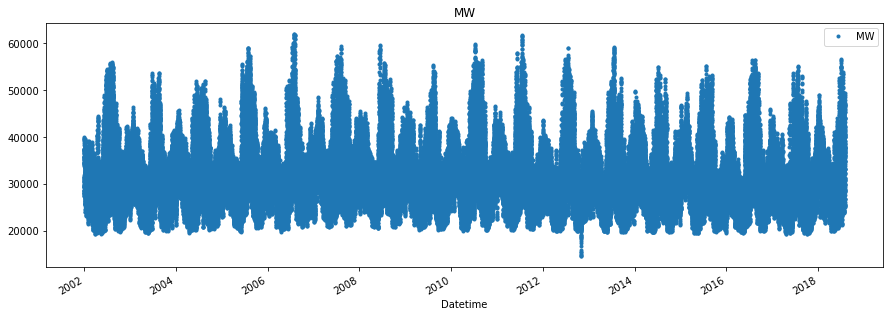

In [4]:
color_pal=sns.color_palette()
df.plot(style='.', 
        figsize=(15,5), 
        color=color_pal[0], 
        title="MW")
plt.show()

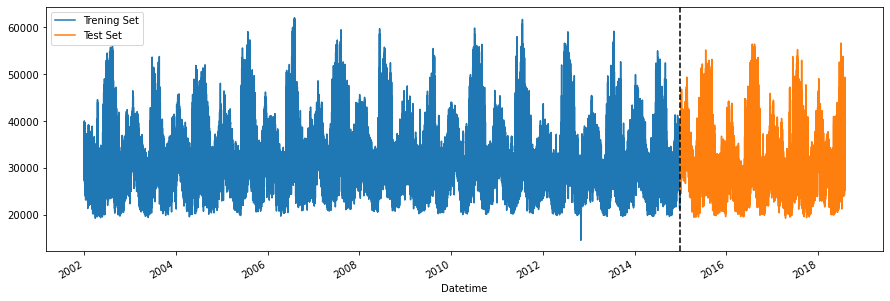

In [5]:
df_train=df.loc[df.index < '2015-01-01']
df_test=df.loc[df.index >= '2015-01-01']
fig,ax=plt.subplots(figsize=(15,5))
df_train.plot(ax=ax, label='Train Set')
df_test.plot(ax=ax, label='Test Set')
ax.axvline('2015-01-01',color='black', ls='--')
ax.legend(['Trening Set',"Test Set"])
plt.show()

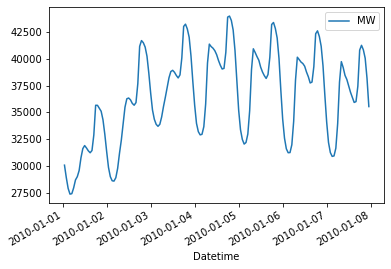

In [6]:
df.loc[(df.index > '2010-01-01') & (df.index<'2010-01-08')].plot()
plt.show()

In [7]:
def create_features(df):
    df['Hour']=df.index.hour
    df['DayOfWeek']=df.index.day_of_week
    df['Quarter']=df.index.quarter
    df['Month']=df.index.month
    df['Year']=df.index.year
    df['DayOfYear']=df.index.day_of_year
    return df

In [8]:
df=create_features(df)

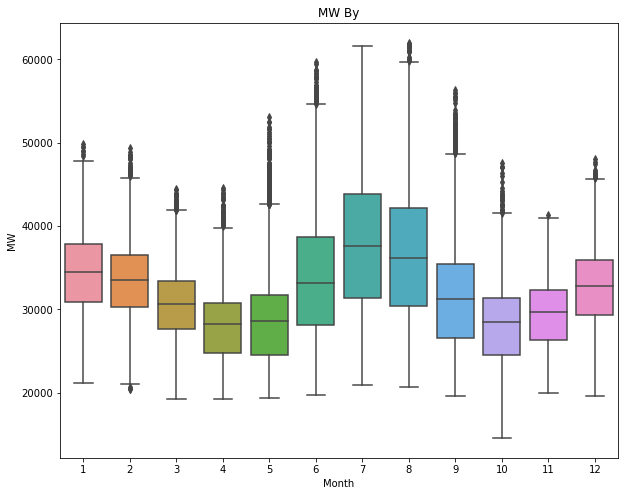

In [9]:
fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x='Month', y='MW')
ax.set_title('MW By')
plt.show()

In [10]:
df_train=create_features(df_train)
df_test=create_features(df_test)

C:\Users\GSTKOCEMP\AppData\Local\Temp\ipykernel_12948\3870149684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour']=df.index.hour
C:\Users\GSTKOCEMP\AppData\Local\Temp\ipykernel_12948\3870149684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek']=df.index.day_of_week
C:\Users\GSTKOCEMP\AppData\Local\Temp\ipykernel_12948\3870149684.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [11]:
df.columns

Index(['MW', 'Hour', 'DayOfWeek', 'Quarter', 'Month', 'Year', 'DayOfYear'], dtype='object')

In [12]:
Features=['Hour', 'DayOfWeek', 'Quarter', 'Month', 'Year', 'DayOfYear']
Target=['MW']

In [13]:
X_train=df_train[Features]
Y_train=df_train[Target]
X_test=df_test[Features]
Y_test=df_test[Target]

In [24]:
reg=xgb.XGBRegressor(n_estimators=6000,
                     early_stopping_rounds=50,
                     learning_rate=0.01)
reg.fit(X_train,Y_train,
        eval_set=[(X_train,Y_train),(X_test,Y_test)],
        verbose=100)

[0]	validation_0-rmse:32601.87826	validation_1-rmse:31654.28935
[100]	validation_0-rmse:12342.17856	validation_1-rmse:11516.21767
[200]	validation_0-rmse:5373.20460	validation_1-rmse:5164.97392
[300]	validation_0-rmse:3375.48321	validation_1-rmse:3834.00707
[400]	validation_0-rmse:2884.85132	validation_1-rmse:3716.33146
[451]	validation_0-rmse:2771.05175	validation_1-rmse:3731.37067


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=6000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

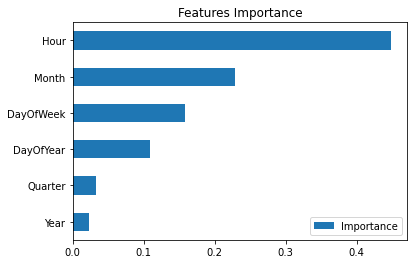

In [25]:
fi=pd.DataFrame(data=reg.feature_importances_,
                index=reg.feature_names_in_,
                columns=['Importance'])
fi.sort_values('Importance').plot(kind='barh', title='Features Importance')
plt.show()

In [26]:
df_test['prediction']=reg.predict(X_test)
df_test

C:\Users\GSTKOCEMP\AppData\Local\Temp\ipykernel_12948\4037992450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['prediction']=reg.predict(X_test)


,MW,Hour,DayOfWeek,Quarter,Month,Year,DayOfYear,prediction
Datetime,,,,,,,,
2015-01-01 00:00:00,32802.0,0,3,1,1,2015,1,31861.591797
2015-12-31 01:00:00,24305.0,1,3,4,12,2015,365,28268.078125
2015-12-31 02:00:00,23156.0,2,3,4,12,2015,365,27164.314453
2015-12-31 03:00:00,22514.0,3,3,4,12,2015,365,26900.753906
2015-12-31 04:00:00,22330.0,4,3,4,12,2015,365,26900.753906
...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,1,2018,1,36855.925781
2018-01-01 21:00:00,43751.0,21,0,1,1,2018,1,36690.816406
2018-01-01 22:00:00,42402.0,22,0,1,1,2018,1,34941.773438


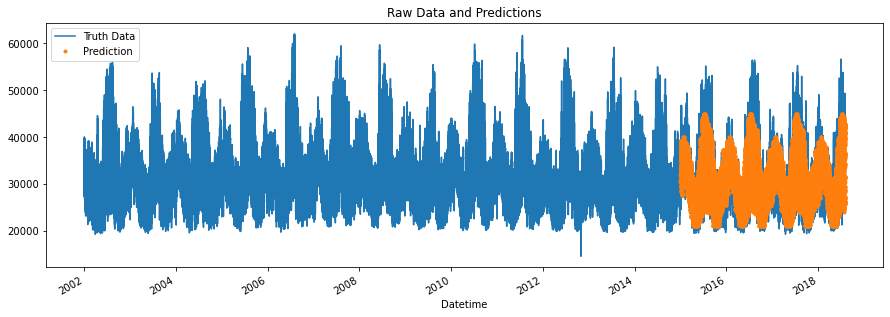

In [28]:
df_merge=df.merge(df_test[['prediction']],how='left',left_index=True, right_index=True)
ax=df_merge[['MW']].plot(figsize=(15,5))
df_merge['prediction'].plot(ax=ax,style='.')
plt.legend(['Truth Data','Prediction'])
ax.set_title('Raw Data and Predictions')
plt.show()

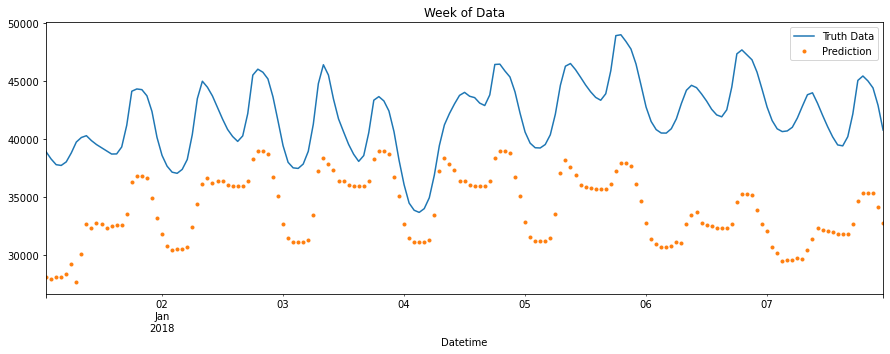

In [29]:
ax=df_merge.loc[(df_merge.index > '2018-01-01') & (df_merge.index<'2018-01-08')]['MW'].plot(figsize=(15,5), title='Week of Data')
df_merge.loc[(df_merge.index > '2018-01-01') & (df_merge.index<'2018-01-08')]['prediction'].plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [3]:
score = np.sqrt(mean_squared_error(df_test['MW'],df_test['prediction']))
score

NameError: name 'np' is not defined

In [376]:
df_test['error']=np.abs(df_test['MW']-df_test['prediction'])

C:\Users\GSTKOCEMP\AppData\Local\Temp\ipykernel_27292\2515870416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['error']=np.abs(df_test['AEP_MW']-df_test['prediction'])


In [377]:
df_test

,AEP_MW,Hour,DayOfWeek,Quarter,Month,Year,DayOfYear,prediction,error
Datetime,,,,,,,,,
2015-01-01 00:00:00,16375.0,0,3,1,1,2015,1,15770.122070,604.877930
2015-12-31 01:00:00,12415.0,1,3,4,12,2015,365,13996.833008,1581.833008
2015-12-31 02:00:00,12087.0,2,3,4,12,2015,365,13812.303711,1725.303711
2015-12-31 03:00:00,12010.0,3,3,4,12,2015,365,13762.524414,1752.524414
2015-12-31 04:00:00,11972.0,4,3,4,12,2015,365,13762.524414,1790.524414
...,...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,21089.0,20,0,1,1,2018,1,17521.707031,3567.292969
2018-01-01 21:00:00,20999.0,21,0,1,1,2018,1,17521.707031,3477.292969
2018-01-01 22:00:00,20820.0,22,0,1,1,2018,1,17481.281250,3338.718750


In [379]:
df_test['date']=df_test.index.date

C:\Users\GSTKOCEMP\AppData\Local\Temp\ipykernel_27292\786869835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['date']=df_test.index.date


In [383]:
df_test.groupby('date')['error'].mean().sort_values(ascending=False).head(5)

date
2015-02-20    5463.627808
2015-02-19    5360.798828
2018-01-06    5094.590454
2018-01-07    4691.275798
2015-02-16    4330.746053
Name: error, dtype: float64

In [384]:
df_test.7

date
2015-09-26    197.526326
2017-11-16    214.395182
2017-10-12    215.652181
2017-05-21    216.835490
2016-06-05    217.749308
Name: error, dtype: float64

In [385]:
#Next Steps:
#More robust validation
#Pipelines
#Add more features (weather forecast, holidays)